### Logistic Regression in Statsmodels

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [3]:
# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Identify some candidates to predict (can we predict `high_quality`? What about `is_red`?)

#### EDA

#### Create a simple bivariate logistic regression

#### Move to multivariate logistic regression

In [4]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality'],
      dtype='object')

In [5]:
df[['total_sulfur_dioxide', 'is_red']].describe()

,total_sulfur_dioxide,is_red
count,6497.000000,6497.000000
mean,115.744574,0.246114
std,56.521855,0.430779
min,6.000000,0.000000
25%,77.000000,0.000000
50%,118.000000,0.000000
75%,156.000000,0.000000
max,440.000000,1.000000


In [6]:
df['total_sulfur_dioxide'].isnull().any()

False

In [8]:
df['is_red'].isnull().any()

False

In [9]:
logit = LogisticRegression()

In [13]:
y = df['is_red']
x = df['total_sulfur_dioxide'].reshape(-1, 1)

In [14]:
logit.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logit.score(x, y)

0.92535016161305217

In [17]:
predictions = logit.predict(x)
predictions[0:5]

array([ 1.,  1.,  1.,  1.,  1.])

In [18]:
predict_proba = logit.predict_proba(x)
predict_proba[0:5]

array([[ 0.09664386,  0.90335614],
       [ 0.45178559,  0.54821441],
       [ 0.26938689,  0.73061311],
       [ 0.34829758,  0.65170242],
       [ 0.09664386,  0.90335614]])

In [20]:
df['total_sulfur_dioxide'].head(5)

0    34.0
1    67.0
2    54.0
3    60.0
4    34.0
Name: total_sulfur_dioxide, dtype: float64

In [22]:
y = df['is_red']
x = df[['total_sulfur_dioxide', 'pH']]


In [23]:
model2 = logit.fit(x, y)

In [24]:
model2.score(x, y)

0.93073726335231644

In [25]:
predictions = model2.predict(x)
predictions[0:5]

array([ 1.,  1.,  1.,  1.,  1.])

In [26]:
predictions_proba = model2.predict_proba(x)
predictions_proba[0:5]

array([[ 0.04572322,  0.95427678],
       [ 0.47447913,  0.52552087],
       [ 0.25300094,  0.74699906],
       [ 0.3953048 ,  0.6046952 ],
       [ 0.04572322,  0.95427678]])

In [27]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


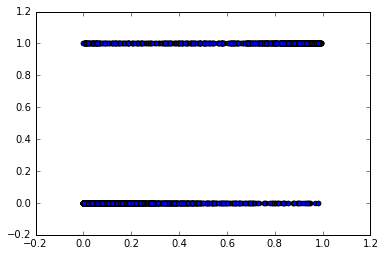

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(predictions_proba[:, 1], y)